<center>
    <H1> ARTIFICIAL NEURAL NETWORK </H1>
    <br>
======================================================================================================================
<br>

## STEP 1: IMPORT LIBRARIES

In [16]:
from numpy import loadtxt
from keras.models import Sequential
from keras.layers import Dense
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split 
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt

In [17]:
#Accuracy and Loss plotting
def plot(history):
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    
    # summarize history for loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

## STEP 2: LOAD DATASET

In [18]:
dataset = pd.read_csv('data/twitter_dataset.csv', encoding = 'latin-1')
dataset.head()          #show first 5 rows

,name_wt,statuses_count,followers_count,friends_count,favourites_count,listed_count,label
0,0.857143,1211,24,63,6,6,0
1,0.250000,313,101,173,48,0,0
2,0.411765,247,51,382,50,4,0
3,0.611111,41,3,36,5,0,0
4,0.600000,12341,770,1417,0,8,1


In [11]:
dataset.shape[1]

7

## STEP 3: FEATURE SELECTION

In [19]:
#Combinig attributes into single list of tuples and using those features create a 2D matrix 

features=[]
for attributes in dataset.columns:
    if attributes != 'label':
        features.append(attributes)

## STEP 4: CREATE TEST AND TRAIN SETS

We will randomly split our dataset in 80–20 ratio. Where 80% of the total data will be used as training set and rest 20% will be considered as test set. 

In [20]:
# data = dataset.as_matrix(columns = features)
data=dataset[features].values
#convert label column into 1D arrray

label = np.array(dataset['label'])


X_train, X_test, y_train, y_test = train_test_split(data, label, test_size=0.2, random_state=0)

In [14]:
print("Number of training instances: ", X_train.shape[0])
print("Number of testing instances: ", X_test.shape[0])

Number of training instances:  5556
Number of testing instances:  1389


## STEP 5: FINE-TUNE HYPERPARAMETERS

There are a number of different parameters that must be decided upon when designing an Artificial Neural Network. Among these parameters are the number of hidden layers, the number of neurons per layer, the number of training iterations, etc. Some of the important parameters in terms of training and network capacity are the number of hidden neurons, the learning rate and the activation function, were tuned first.

### a. Number of Hidden Layers

In [15]:
#initialisations
max_iterations=10
number_of_hidden_layers=0
step=2


accuracy_list=[[0]*2 for _ in range(max_iterations)]
# define the keras model

for i in range(0,max_iterations):
    model = Sequential()
    # tanh and relu -check
    
    model.add(Dense(15, input_dim=len(features), activation='relu'))
    
    for j in range(number_of_hidden_layers):
        model.add(Dense(8, activation='relu'))
            
#     model.add(Dense(10, activation='relu'))
#     model.add(Dense(8, activation='relu'))
#     model.add(Dense(5, activation='relu'))
    
    model.add(Dense(1, activation='sigmoid'))

    # compile the keras model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

    # fit the keras model on the dataset
    model.fit(X_train, y_train, epochs=150, batch_size=150)

    # evaluate the keras model
    _,accuracy = model.evaluate(X_test, y_test)
    
    print("i",i)
    accuracy_list[i][0]=number_of_hidden_layers
    accuracy_list[i][1]=accuracy
#     accuracy_list.append[number_of_hidden_layers , accuracy]
    
    number_of_hidden_layers+=step

#     print('Accuracy: %.2f' % (accuracy*100))

Epoch 1/150
5556/5556 [==============================] - 0s 33us/step - loss: 3200.7510 - accuracy: 0.3602
Epoch 2/150
5556/5556 [==============================] - 0s 17us/step - loss: 1225.4953 - accuracy: 0.1748
Epoch 3/150
5556/5556 [==============================] - 0s 17us/step - loss: 139.4003 - accuracy: 0.4568
Epoch 4/150
5556/5556 [==============================] - 0s 21us/step - loss: 47.9160 - accuracy: 0.6168
Epoch 5/150
5556/5556 [==============================] - 0s 15us/step - loss: 35.7072 - accuracy: 0.6604
Epoch 6/150
5556/5556 [==============================] - 0s 24us/step - loss: 30.1679 - accuracy: 0.6686
Epoch 7/150
5556/5556 [==============================] - 0s 13us/step - loss: 25.2738 - accuracy: 0.6848
Epoch 8/150
5556/5556 [==============================] - 0s 15us/step - loss: 20.0922 - accuracy: 0.7212
Epoch 9/150
5556/5556 [==============================] - 0s 17us/step - loss: 17.7644 - accuracy: 0.8094
Epoch 10/150
5556/5556 [==========================

5556/5556 [==============================] - 0s 14us/step - loss: 2.2210 - accuracy: 0.9255
Epoch 79/150
5556/5556 [==============================] - 0s 23us/step - loss: 1.5449 - accuracy: 0.9397
Epoch 80/150
5556/5556 [==============================] - 0s 14us/step - loss: 2.2557 - accuracy: 0.9253
Epoch 81/150
5556/5556 [==============================] - 0s 14us/step - loss: 1.6119 - accuracy: 0.9293
Epoch 82/150
5556/5556 [==============================] - 0s 14us/step - loss: 2.2753 - accuracy: 0.9311
Epoch 83/150
5556/5556 [==============================] - 0s 14us/step - loss: 2.0812 - accuracy: 0.9258
Epoch 84/150
5556/5556 [==============================] - 0s 15us/step - loss: 2.2403 - accuracy: 0.9325
Epoch 85/150
5556/5556 [==============================] - 0s 15us/step - loss: 1.6647 - accuracy: 0.9307
Epoch 86/150
5556/5556 [==============================] - 0s 14us/step - loss: 1.5672 - accuracy: 0.9336
Epoch 87/150
5556/5556 [==============================] - 0s 16us/st

5556/5556 [==============================] - 0s 14us/step - loss: 0.9025 - accuracy: 0.5772
Epoch 6/150
5556/5556 [==============================] - 0s 16us/step - loss: 0.8344 - accuracy: 0.6019
Epoch 7/150
5556/5556 [==============================] - 0s 16us/step - loss: 0.7566 - accuracy: 0.6841
Epoch 8/150
5556/5556 [==============================] - 0s 16us/step - loss: 0.7001 - accuracy: 0.7514
Epoch 9/150
5556/5556 [==============================] - 0s 19us/step - loss: 0.6799 - accuracy: 0.7779
Epoch 10/150
5556/5556 [==============================] - 0s 14us/step - loss: 0.6726 - accuracy: 0.7865
Epoch 11/150
5556/5556 [==============================] - 0s 17us/step - loss: 0.6549 - accuracy: 0.7790
Epoch 12/150
5556/5556 [==============================] - 0s 15us/step - loss: 0.6590 - accuracy: 0.7801
Epoch 13/150
5556/5556 [==============================] - 0s 16us/step - loss: 0.6384 - accuracy: 0.7799
Epoch 14/150
5556/5556 [==============================] - 0s 15us/step -

5556/5556 [==============================] - 0s 19us/step - loss: 0.3311 - accuracy: 0.8891
Epoch 84/150
5556/5556 [==============================] - 0s 15us/step - loss: 0.3189 - accuracy: 0.8983
Epoch 85/150
5556/5556 [==============================] - 0s 16us/step - loss: 0.2947 - accuracy: 0.8954
Epoch 86/150
5556/5556 [==============================] - 0s 16us/step - loss: 0.2919 - accuracy: 0.9021
Epoch 87/150
5556/5556 [==============================] - 0s 20us/step - loss: 0.3400 - accuracy: 0.8873
Epoch 88/150
5556/5556 [==============================] - 0s 15us/step - loss: 0.2777 - accuracy: 0.8985
Epoch 89/150
5556/5556 [==============================] - 0s 17us/step - loss: 0.3426 - accuracy: 0.8868
Epoch 90/150
5556/5556 [==============================] - 0s 17us/step - loss: 0.3285 - accuracy: 0.8960
Epoch 91/150
5556/5556 [==============================] - 0s 15us/step - loss: 0.3800 - accuracy: 0.8400
Epoch 92/150
5556/5556 [==============================] - 0s 15us/st

5556/5556 [==============================] - 0s 18us/step - loss: 0.8264 - accuracy: 0.8596
Epoch 11/150
5556/5556 [==============================] - 0s 14us/step - loss: 0.5205 - accuracy: 0.8683
Epoch 12/150
5556/5556 [==============================] - 0s 20us/step - loss: 0.5760 - accuracy: 0.8566
Epoch 13/150
5556/5556 [==============================] - 0s 17us/step - loss: 0.5476 - accuracy: 0.8719
Epoch 14/150
5556/5556 [==============================] - 0s 17us/step - loss: 0.4999 - accuracy: 0.8737
Epoch 15/150
5556/5556 [==============================] - 0s 15us/step - loss: 0.7523 - accuracy: 0.8706
Epoch 16/150
5556/5556 [==============================] - 0s 19us/step - loss: 0.4582 - accuracy: 0.8679
Epoch 17/150
5556/5556 [==============================] - 0s 19us/step - loss: 0.4792 - accuracy: 0.8652
Epoch 18/150
5556/5556 [==============================] - 0s 16us/step - loss: 0.6335 - accuracy: 0.8639
Epoch 19/150
5556/5556 [==============================] - 0s 18us/st

5556/5556 [==============================] - 0s 38us/step - loss: 0.9691 - accuracy: 0.9149
Epoch 89/150
5556/5556 [==============================] - 0s 35us/step - loss: 0.2100 - accuracy: 0.9320
Epoch 90/150
5556/5556 [==============================] - 0s 39us/step - loss: 0.1669 - accuracy: 0.9411
Epoch 91/150
5556/5556 [==============================] - 0s 29us/step - loss: 0.1707 - accuracy: 0.9392
Epoch 92/150
5556/5556 [==============================] - 0s 34us/step - loss: 0.1914 - accuracy: 0.9368
Epoch 93/150
5556/5556 [==============================] - 0s 22us/step - loss: 0.2010 - accuracy: 0.9388
Epoch 94/150
5556/5556 [==============================] - 0s 17us/step - loss: 0.2006 - accuracy: 0.9365
Epoch 95/150
5556/5556 [==============================] - 0s 21us/step - loss: 0.1748 - accuracy: 0.9419
Epoch 96/150
5556/5556 [==============================] - 0s 25us/step - loss: 0.1996 - accuracy: 0.9316
Epoch 97/150
5556/5556 [==============================] - 0s 19us/st

5556/5556 [==============================] - 0s 27us/step - loss: 0.4463 - accuracy: 0.8781
Epoch 15/150
5556/5556 [==============================] - 0s 20us/step - loss: 0.4354 - accuracy: 0.8816
Epoch 16/150
5556/5556 [==============================] - 0s 26us/step - loss: 0.4259 - accuracy: 0.8835
Epoch 17/150
5556/5556 [==============================] - 0s 20us/step - loss: 0.4176 - accuracy: 0.8875
Epoch 18/150
5556/5556 [==============================] - 0s 24us/step - loss: 0.4099 - accuracy: 0.8918
Epoch 19/150
5556/5556 [==============================] - 0s 22us/step - loss: 0.4024 - accuracy: 0.8933
Epoch 20/150
5556/5556 [==============================] - 0s 25us/step - loss: 0.3959 - accuracy: 0.8931
Epoch 21/150
5556/5556 [==============================] - 0s 25us/step - loss: 0.3890 - accuracy: 0.8943
Epoch 22/150
5556/5556 [==============================] - 0s 23us/step - loss: 0.3872 - accuracy: 0.8945
Epoch 23/150
5556/5556 [==============================] - 0s 25us/st

5556/5556 [==============================] - 0s 17us/step - loss: 0.2839 - accuracy: 0.9015
Epoch 93/150
5556/5556 [==============================] - 0s 17us/step - loss: 0.2708 - accuracy: 0.9068
Epoch 94/150
5556/5556 [==============================] - 0s 28us/step - loss: 0.2583 - accuracy: 0.9129
Epoch 95/150
5556/5556 [==============================] - 0s 19us/step - loss: 0.2635 - accuracy: 0.9113
Epoch 96/150
5556/5556 [==============================] - 0s 17us/step - loss: 0.2683 - accuracy: 0.9062
Epoch 97/150
5556/5556 [==============================] - 0s 18us/step - loss: 0.2574 - accuracy: 0.9125
Epoch 98/150
5556/5556 [==============================] - 0s 17us/step - loss: 0.2547 - accuracy: 0.9122
Epoch 99/150
5556/5556 [==============================] - 0s 23us/step - loss: 0.2516 - accuracy: 0.9141
Epoch 100/150
5556/5556 [==============================] - 0s 19us/step - loss: 0.2550 - accuracy: 0.9143
Epoch 101/150
5556/5556 [==============================] - 0s 17us/

5556/5556 [==============================] - 0s 24us/step - loss: 0.2872 - accuracy: 0.9037
Epoch 20/150
5556/5556 [==============================] - 0s 19us/step - loss: 0.2766 - accuracy: 0.9046
Epoch 21/150
5556/5556 [==============================] - 0s 22us/step - loss: 0.2615 - accuracy: 0.9107
Epoch 22/150
5556/5556 [==============================] - 0s 22us/step - loss: 0.2460 - accuracy: 0.9188
Epoch 23/150
5556/5556 [==============================] - 0s 20us/step - loss: 0.2654 - accuracy: 0.9066
Epoch 24/150
5556/5556 [==============================] - 0s 26us/step - loss: 0.2432 - accuracy: 0.9221
Epoch 25/150
5556/5556 [==============================] - 0s 20us/step - loss: 0.2536 - accuracy: 0.9134
Epoch 26/150
5556/5556 [==============================] - 0s 21us/step - loss: 0.2256 - accuracy: 0.9282
Epoch 27/150
5556/5556 [==============================] - 0s 25us/step - loss: 0.2212 - accuracy: 0.9282
Epoch 28/150
5556/5556 [==============================] - 0s 19us/st

KeyboardInterrupt: 

In [ ]:
for i in range(len(accuracy_list)):
    print(accuracy_list[i][0],"\t",accuracy_list[i][1])

In [ ]:
#number of hidden layers vs accuracy
accuracy_list

In [ ]:
plot(history)

### b. Activation Functions

Output layer will have Sigmoid function. Different combinations of Tanh and ReLU activation functions will be used to get the best results.

In [ ]:
#create model
model1 = Sequential()
# tanh and relu -check

#add hidden layers
#experimentally it was found that when ReLU activation function was applied to all the layers, the model gave the best result.
model1.add(Dense(15, input_dim=len(features), activation='relu'))
model1.add(Dense(4, activation='relu'))
model1.add(Dense(4, activation='relu'))
model1.add(Dense(4, activation='relu'))
model1.add(Dense(4, activation='relu'))
model1.add(Dense(4, activation='relu'))
model1.add(Dense(4, activation='relu'))
model1.add(Dense(1, activation='sigmoid'))

model1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

#fit the model
model1.fit(X_train, y_train, epochs=150, batch_size=150)

# evaluate the model
_,accuracy = model1.evaluate(X_test, y_test)

print('Accuracy: %.2f' % (accuracy*100))

In [ ]:
#create model
model1 = Sequential()
# tanh and relu -check

#add hidden layers
model1.add(Dense(15, input_dim=len(features), activation='relu'))
model1.add(Dense(4, activation='tanh'))
model1.add(Dense(4, activation='relu'))
model1.add(Dense(4, activation='relu'))
model1.add(Dense(4, activation='relu'))
model1.add(Dense(4, activation='relu'))
model1.add(Dense(4, activation='relu'))
model1.add(Dense(1, activation='sigmoid'))

model1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

#fit the model
model1.fit(X_train, y_train, epochs=150, batch_size=150)

# evaluate the model
_,accuracy = model1.evaluate(X_test, y_test)

print('Accuracy: %.2f' % (accuracy*100))

### c. Number of neurons in hidden layers

In [ ]:
max_iterations=10
number_of_neurons=2
step=2


accuracy_list=[[0]*2 for _ in range(max_iterations)]
# define the keras model

for i in range(0,max_iterations):  
    model2 = Sequential()
    # tanh and relu -check
    
    #add hidden layers
    model2.add(Dense(15, input_dim=len(features), activation='relu'))
    model2.add(Dense(number_of_neurons, activation='relu'))
    model2.add(Dense(number_of_neurons, activation='relu'))
    model2.add(Dense(number_of_neurons, activation='relu'))
    model2.add(Dense(number_of_neurons, activation='relu'))
    model2.add(Dense(number_of_neurons, activation='relu'))
    model2.add(Dense(number_of_neurons, activation='relu'))
    model2.add(Dense(1, activation='sigmoid'))
    
    model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    model2.fit(X_train, y_train, epochs=150, batch_size=150)
    
    # evaluate the model
    _,accuracy = model2.evaluate(X_test, y_test)

    accuracy_list[i][0]=number_of_neurons
    accuracy_list[i][1]=accuracy*100
#     print('Accuracy: %.2f' % (accuracy*100))
    print(accuracy_list[i][1])
    number_of_neurons += step

In [ ]:
for i in range(len(accuracy_list)):
    print(accuracy_list[i][0],"\t",accuracy_list[i][1])

### d. Number of Ephocs

In [ ]:
max_iterations=100
number_of_ephocs=0
step=10


accuracy_list=[[0]*2 for _ in range(max_iterations)]
# define the keras model

for i in range(0,max_iterations):
    model1 = Sequential()

    model1.add(Dense(15, input_dim=len(features), activation='relu'))
    model1.add(Dense(10, activation='relu'))
    model1.add(Dense(10, activation='relu'))
    model1.add(Dense(10, activation='relu'))
    model1.add(Dense(10, activation='relu'))
    model1.add(Dense(10, activation='relu'))
    model1.add(Dense(10, activation='relu'))
    model1.add(Dense(1, activation='sigmoid'))
    model1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    history=model1.fit(X_train, y_train, epochs=number_of_ephocs, batch_size=150,validation_split=0.30)
    
    # evaluate the model
    number_of_ephocs+=step
    _,accuracy = model1.evaluate(X_test, y_test)

    print('Accuracy: %.2f' % (accuracy*100))

## STEP 6: TRAIN THE FINAL MODEL

Using fine-tuned hyperparamters

In [21]:
model1 = Sequential()

#Arcitecture of the ANN
model1.add(Dense(15, input_dim=len(features), activation='relu'))
model1.add(Dense(10, activation='relu'))
model1.add(Dense(10, activation='relu'))
model1.add(Dense(10, activation='relu'))
model1.add(Dense(10, activation='relu'))
model1.add(Dense(10, activation='relu'))
model1.add(Dense(10, activation='relu'))
model1.add(Dense(1, activation='sigmoid'))

model1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

#training the model
history = model1.fit(X_train, y_train, epochs=375, batch_size=150,validation_split=0.30,verbose=0)

In [22]:
#evaluate the model
_,accuracy = model1.evaluate(X_test, y_test)

print('Accuracy: %.2f' % (accuracy*100))

1389/1389 [==============================] - 0s 64us/step
Accuracy: 97.26


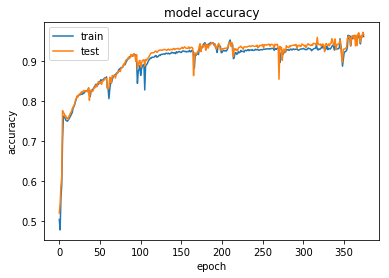

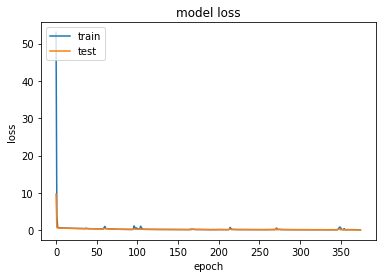

In [23]:
plot(history)

In [ ]:
# label = model1.predict_classes(X_test)
# label

In [ ]:
# np.reshape(X_test[test_case:test_case+1],(6,)).shape

## STEP 7: EVALUATION OF CLASSIFICATION RESULTS

The classifier will be evaluted using Accuracy, Recall, Precision and F-measure. For this first, a confusion matrix will be created. 

In [ ]:
y_predict =   model1.predict_classes(X_test)                #to store prediction of each test example

In [ ]:
conf_matrix = confusion_matrix(y_test, y_predict)

In [ ]:
#true_negative
TN = conf_matrix[0][0]

#false_negative
FN = conf_matrix[1][0]

#false_positive
FP = conf_matrix[0][1]

#true_positive
TP = conf_matrix[1][1]

In [ ]:
# Recall is the ratio of the total number of correctly classified positive examples divided by the total number of positive examples. 
# High Recall indicates the class is correctly recognized (small number of FN)

recall = (TP)/(TP + FN)

In [ ]:
precision = (TP)/(TP + FP)

In [ ]:
fmeasure = (2*recall*precision)/(recall+precision)
accuracy = (TP + TN)/(TN + FN + FP + TP)
#accuracy_score(y_test, y_predict)

In [ ]:
print("------ CLASSIFICATION PERFORMANCE OF THE NEURAL NETWORKS MODEL ------ \n"\
      "\n Recall : ", (recall*100) ,"%" \
      "\n Precision : ", (precision*100) ,"%" \
      "\n Accuracy : ", (accuracy*100) ,"%" \
      "\n F-measure : ", (fmeasure*100) ,"%" )


In [ ]:
print(history.history.keys())    #to list all data in history

In [ ]:
history.history['accuracy']

In [ ]:
plot(history)

In [ ]:
#Accuracy and Loss plotting
def plot(history):
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    
    # summarize history for loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()